# Skeleton plots that shows the synapse placement of all 7 clusters by module on the oviINr arbor
Steps in this file:
- Import skeleton, using 2d skeletons segments (kind of buggy)
- Import partition data for input connectome
- Import synapse location data
- Process dataframes so that synapse location and cluster are on the same dataframe
- Assign colors with a dictionary and then map
- Plot segments and synapses with legend

Written by Rhessa Weber Langstaff

In [2]:
# Imports
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import bokeh
import bokeh.palettes
from bokeh.plotting import figure, output_notebook, show, output_file, gridplot
from bokeh.io import export_svg, export_png
from bokeh.models import Legend, LegendItem
import os
from neuprint import Client, fetch_adjacencies

In [3]:
# set up the neuprint client
#auth_token_file = open("/Users/rhessa/flybrain-clustering-rhessa/flybrain.auth.txt", 'r') # need file containing the authentication token
auth_token_file = open("flybrain.auth.txt", 'r') # need file containing the authentication token
auth_token = next(auth_token_file).strip()
try:
    np_client = Client('neuprint.janelia.org', dataset='hemibrain:v1.2.1', token=auth_token)
except:
    np_client = None

output_notebook()

Loading BokehJS ...

In [4]:
# Create skeleton for later usage (inspired from Prof G.'s notebook ovi_specs_sandbox.ipynb)
# body Ids of oviINs
ovi_r = 423101189
ovi_l = 485934965
#ovis = [ovi_r, ovi_l]

# create skeleton for oviINr
skeletons = []

s = np_client.fetch_skeleton(ovi_r, format='pandas')
s['bodyId'] = ovi_r
s['color'] = bokeh.palettes.Greys[3][1]
skeletons.append(s)

skeletons = pd.concat(skeletons, ignore_index=True)

In [5]:
# Join parent nodes
segments = skeletons.merge(skeletons, left_on=['bodyId', 'link'], right_on=['bodyId', 'rowId'], suffixes=['_child', '_parent'])

In [6]:
skeletons

rowId        x        y        z     radius   link     bodyId    color
0          1  21236.0  29916.0   9080.0  12.000000     -1  423101189  #bdbdbd
1          2  21212.0  29940.0   9104.0  21.941099      1  423101189  #bdbdbd
2          3  21188.0  29964.0   9128.0  21.941099      2  423101189  #bdbdbd
3          4  21188.0  29988.0   9152.0  12.000000      3  423101189  #bdbdbd
4          5  21188.0  30012.0   9176.0  12.000000      4  423101189  #bdbdbd
...      ...      ...      ...      ...        ...    ...        ...      ...
84239  84240  22676.0  25236.0  32864.0  12.000000  84239  423101189  #bdbdbd
84240  84241  22700.0  25212.0  32840.0  12.000000  84240  423101189  #bdbdbd
84241  84242  22700.0  25236.0  32792.0  12.000000  84241  423101189  #bdbdbd
84242  84243  22700.0  25236.0  32768.0  12.000000  84242  423101189  #bdbdbd
84243  84244  22724.0  25236.0  32744.0  12.000000  84243  423101189  #bdbdbd

[84244 rows x 8 columns]

In [7]:
# pre-synaptic oviINs
pre_n, pre_conn = fetch_adjacencies(None, ovi_r)

#Group pre_conn by connection pair, dropping the roi column, and summing the weight column
pre_conn = pre_conn[['bodyId_pre','bodyId_post','weight']].groupby(['bodyId_pre', 'bodyId_post']).sum().reset_index()

In [8]:
pre_conn

bodyId_pre  bodyId_post  weight
0      234630133    423101189       2
1      263674097    423101189       2
2      266187480    423101189       1
3      266187559    423101189       3
4      267214250    423101189       9
...          ...          ...     ...
2519  5901231318    423101189       1
2520  5901232053    423101189       3
2521  6400000773    423101189       2
2522  7112622044    423101189       3
2523  7112624972    423101189       1

[2524 rows x 3 columns]

In [9]:
# import full connectome data and location data
ovi_node_df  = pd.read_csv('modularity_runs/0.0/0-0_98765.txt', header=None, sep=' ', names=['id', "0.0"])

# Import synapse location data for pre-synaptic sites
ovi_pre_syns = pd.read_csv('data/ovi_pre_syns.csv')

ovi_pre_syns

bodyId_pre  bodyId_post roi_pre roi_post  x_pre  y_pre  z_pre  x_post  \
0       989228019    423101189  CRE(R)   CRE(R)  22857  34611  17485   22825   
1       988909130    423101189  CRE(R)   CRE(R)  19523  31096  21707   19509   
2       988567837    423101189  LAL(R)   LAL(R)  23100  27659  23824   23074   
3       987842109    423101189  SMP(R)   SMP(R)  19041  33090  14598   19047   
4       987273073    423101189  CRE(R)   CRE(R)  19347  27826  15348   19351   
...           ...          ...     ...      ...    ...    ...    ...     ...   
21619  1006928515    423101189      IB       IB  22664  14840  19749   22651   
21620  1005952640    423101189      IB       IB  21998  15625  18990   22007   
21621  1005952640    423101189      IB       IB  22998  15275  23049   23014   
21622  1005952640    423101189      IB       IB  23034  15380  23131   23048   
21623  1003215282    423101189      IB       IB  24301  16887  21862   24282   

       y_post  z_post  confidence_pre  confidence_post type_pre type_post  
0       34624   17464           0.998         0.633171     FB5V     oviIN  
1       31112   21693           0.969         0.528840     FB5V     oviIN  
2       27659   23801           0.970         0.459446     FB4G     oviIN  
3       33072   14598           0.973         0.974019      NaN     oviIN  
4       27806   15376           0.943         0.595921      NaN     oviIN  
...       ...     ...             ...              ...      ...       ...  
21619   14823   19757           0.994         0.865103    CL300     oviIN  
21620   15603   18991           0.996         0.929040    IB058     oviIN  
21621   15272   23060           0.835         0.780000    IB058     oviIN  
21622   15364   23146           0.986         0.905853    IB058     oviIN  
21623   16879   21874           0.993         0.868024    CL229     oviIN  

[21624 rows x 14 columns]

In [10]:
# edit dataframes for easy merging
ovi_clusters = ovi_node_df[['id', '0.0']].copy()
ovi_locs = ovi_pre_syns[['bodyId_pre', 'x_post', 'y_post', 'z_post', 'type_pre']].copy()

# merge synapse data onto cluster data
ovi_plotting = ovi_clusters.merge(ovi_locs, left_on='id', right_on='bodyId_pre').drop(columns='bodyId_pre')
ovi_plotting

id  0.0  x_post  y_post  z_post type_pre
0      1003215282    1   24282   16879   21874    CL229
1      1005952640    2   22007   15603   18991    IB058
2      1005952640    2   23014   15272   23060    IB058
3      1005952640    2   23048   15364   23146    IB058
4      1006928515    3   22651   14823   19757    CL300
...           ...  ...     ...     ...     ...      ...
18777   987117151    2   17185   30699   23308   LAL010
18778   987273073    6   19351   27806   15376      NaN
18779   988567837    5   23074   27659   23801     FB4G
18780   988909130    5   19509   31112   21693     FB5V
18781   989228019    5   22825   34624   17464     FB5V

[18782 rows x 6 columns]

In [11]:
# Create color dictionary where each number in column 0.0 is assigned a color
#colors = ['', '#', '#e7cf57', '#ff6a88', '#', '#', '#9fad2b']
color_dict = {1: '#4e90d3', 2: '#9467bd', 3: '#e7cf57', 4: '#ff6a88', 5: '#5cc9ff', 6: '#3a9f82', 7: '#9fad2b'}

# Merge color dictionary onto dataframe
ovi_plotting['color'] = ovi_plotting['0.0'].map(color_dict)
ovi_plotting

id  0.0  x_post  y_post  z_post type_pre    color
0      1003215282    1   24282   16879   21874    CL229  #4e90d3
1      1005952640    2   22007   15603   18991    IB058  #9467bd
2      1005952640    2   23014   15272   23060    IB058  #9467bd
3      1005952640    2   23048   15364   23146    IB058  #9467bd
4      1006928515    3   22651   14823   19757    CL300  #e7cf57
...           ...  ...     ...     ...     ...      ...      ...
18777   987117151    2   17185   30699   23308   LAL010  #9467bd
18778   987273073    6   19351   27806   15376      NaN  #3a9f82
18779   988567837    5   23074   27659   23801     FB4G  #5cc9ff
18780   988909130    5   19509   31112   21693     FB5V  #5cc9ff
18781   989228019    5   22825   34624   17464     FB5V  #5cc9ff

[18782 rows x 7 columns]

In [12]:
ovi_clusters

id  0.0
0     1003215282    1
1     1005952640    2
2     1006928515    3
3     1007260806    3
4     1008024276    4
...          ...  ...
1827   987117151    2
1828   987273073    6
1829   988567837    5
1830   988909130    5
1831   989228019    5

[1832 rows x 2 columns]

In [13]:
# Merge connections and modularity data
pre_only = pre_conn[['bodyId_pre', 'weight']].copy()
pre_conn_mod = pre_only.merge(ovi_clusters, left_on='bodyId_pre', right_on='id', how='right').drop(columns='id')
pre_conn_mod

bodyId_pre  weight  0.0
0     1003215282       1    1
1     1005952640       3    2
2     1006928515       1    3
3     1007260806       7    3
4     1008024276       1    4
...          ...     ...  ...
1827   987117151      14    2
1828   987273073       1    6
1829   988567837       1    5
1830   988909130       1    5
1831   989228019       1    5

[1832 rows x 3 columns]

In [14]:
# Merge type onto dataframe using pre_n
pre_conn_mod_types = pre_conn_mod.merge(pre_n[['bodyId', 'type']], left_on='bodyId_pre', right_on='bodyId', how='left')
pre_conn_mod_types

bodyId_pre  weight  0.0      bodyId    type
0     1003215282       1    1  1003215282   CL229
1     1005952640       3    2  1005952640   IB058
2     1006928515       1    3  1006928515   CL300
3     1007260806       7    3  1007260806   CL301
4     1008024276       1    4  1008024276    FB5N
...          ...     ...  ...         ...     ...
1827   987117151      14    2   987117151  LAL010
1828   987273073       1    6   987273073    None
1829   988567837       1    5   988567837    FB4G
1830   988909130       1    5   988909130    FB5V
1831   989228019       1    5   989228019    FB5V

[1832 rows x 5 columns]

In [15]:
# Getting the strongest celltype inputs 
c1 = pre_conn_mod_types[pre_conn_mod_types['0.0'] == 1].drop(columns=['bodyId_pre', 'bodyId'])
c1_grouped = c1.groupby(['type','0.0']).sum('weight').sort_values('weight', ascending=False)
c1_grouped.head(20)

weight
type     0.0        
SMP052   1       361
SMP176   1       287
SMP383   1       281
SMP051   1       157
SMP237   1       135
SMP520   1       125
SMP314   1       106
SMP464   1        97
SMP516   1        93
SMP339   1        82
SMP162   1        74
CL236    1        65
SMP512   1        65
SMP463   1        64
AVLP075  1        61
SMP319   1        59
SMP317   1        54
SMP315   1        51
SMP271   1        48
SMP316_b 1        47

In [16]:
# get top 20 celltypes for each cluster in 0.0 using the process above and add to a dataframe
top_20 = pd.DataFrame()
for i in range(1, 8):
    c = pre_conn_mod_types[pre_conn_mod_types['0.0'] == i].drop(columns=['bodyId_pre', 'bodyId'])
    #c_grouped = c.groupby('type').sum().sort_values('weight', ascending=False).head(20)
    c_grouped = c.groupby(['type','0.0']).sum('weight').sort_values('weight', ascending=False).head(20)
    c_grouped['cluster'] = i
    top_20 = pd.concat([top_20, c_grouped])

top_20


weight  cluster
type   0.0                 
SMP052 1       361        1
SMP176 1       287        1
SMP383 1       281        1
SMP051 1       157        1
SMP237 1       135        1
...            ...      ...
pC1a   7        34        7
SMP589 7        32        7
SLP212 7        31        7
SMP032 7        19        7
pC1b   7        19        7

[140 rows x 2 columns]

In [17]:
# reset index for plotting
top_20 = top_20.reset_index()
top_20

type  0.0  weight  cluster
0    SMP052    1     361        1
1    SMP176    1     287        1
2    SMP383    1     281        1
3    SMP051    1     157        1
4    SMP237    1     135        1
..      ...  ...     ...      ...
135    pC1a    7      34        7
136  SMP589    7      32        7
137  SLP212    7      31        7
138  SMP032    7      19        7
139    pC1b    7      19        7

[140 rows x 4 columns]

In [18]:
# Plot the skeleton plot so it just shows one cluster at a time, should be 7 plots
#clusters = [1, 2, 3, 4, 5, 6, 7]
def cluster_nt(df, cluster_list, all_one=False):
    if all_one:
        fig, ax = plt.subplots(3,3,figsize=(18, 18))
        for i, cluster in enumerate(cluster_list):
            ax[int(i /3), i % 3].invert_yaxis()  # Flip the y-axis 
            # drop y axis
            ax[int(i / 3), i % 3].set_yticks([])
            ax[int(i / 3), i % 3].set_xticks([])
            df_x = df[df['0.0']==cluster]
            for index, row in segments.iterrows():
                ax[int(i / 3), i % 3].plot([row['x_child'], row['x_parent']], [row['z_child'], row['z_parent']], c=row['color_child'], linewidth= 0.5, zorder=1)
            # Plot skeleton 6 times, each time with a different cluster
            ax[int(i / 3), i % 3].scatter(df_x['x_post'], df_x['z_post'], color=df_x["color"], s=1, zorder=10)
            # Set title for the subplot
            ax[int(i / 3), i % 3].set_title('Cluster ' + str(cluster))
    else:
    # Create a new plot for each cluster
        for cluster in cluster_list:
            # create plot with two subplots
            fig, ax = plt.subplots(1, 2, figsize=(18, 9))
            ax[0].invert_yaxis()
            ax[1].invert_yaxis()
            # drop axis
            ax[0].set_yticks([])
            ax[0].set_xticks([])

            # drop axis
            ax[1].set_yticks([])
            ax[1].set_xticks([])

            df_x = df[df['0.0']==cluster]
            for index, row in segments.iterrows():
                ax[0].plot([row['x_child'], row['x_parent']], [row['z_child'], row['z_parent']], c=row['color_child'], linewidth= 0.5, zorder=1)
                ax[1].plot([row['y_child'], row['y_parent']], [row['z_child'], row['z_parent']], c=row['color_child'], linewidth= 0.5, zorder=1)

            # Plot skeleton each time with a different cluster
            ax[0].scatter(df_x['x_post'], df_x['z_post'], color=df_x["color"], s=5, zorder=10)
            ax[1].scatter(df_x['y_post'], df_x['z_post'], color=df_x["color"], s=5, zorder=10)
            # Set title for the subplot
            ax[0].set_title('Cluster ' + str(cluster) + ' (front)')
            ax[1].set_title('Cluster ' + str(cluster) + ' (lateral)')
            # Legend should be the top 20 celltypes for each cluster
            handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=color_dict[cluster], markersize=5) for i in range(20)]
            labels = top_20[top_20['cluster'] == cluster]['type'].values
            # legend should be right of the plot, tight layout so there isnt alot of blank space
            ax[1].legend(handles, labels, loc='center right', title='Top 20 cell types', bbox_to_anchor=(1.25, 0.5))

    return fig

In [22]:
clusters = ovi_clusters['0.0'].unique()
clusters

array([1, 2, 3, 4, 5, 6, 7])

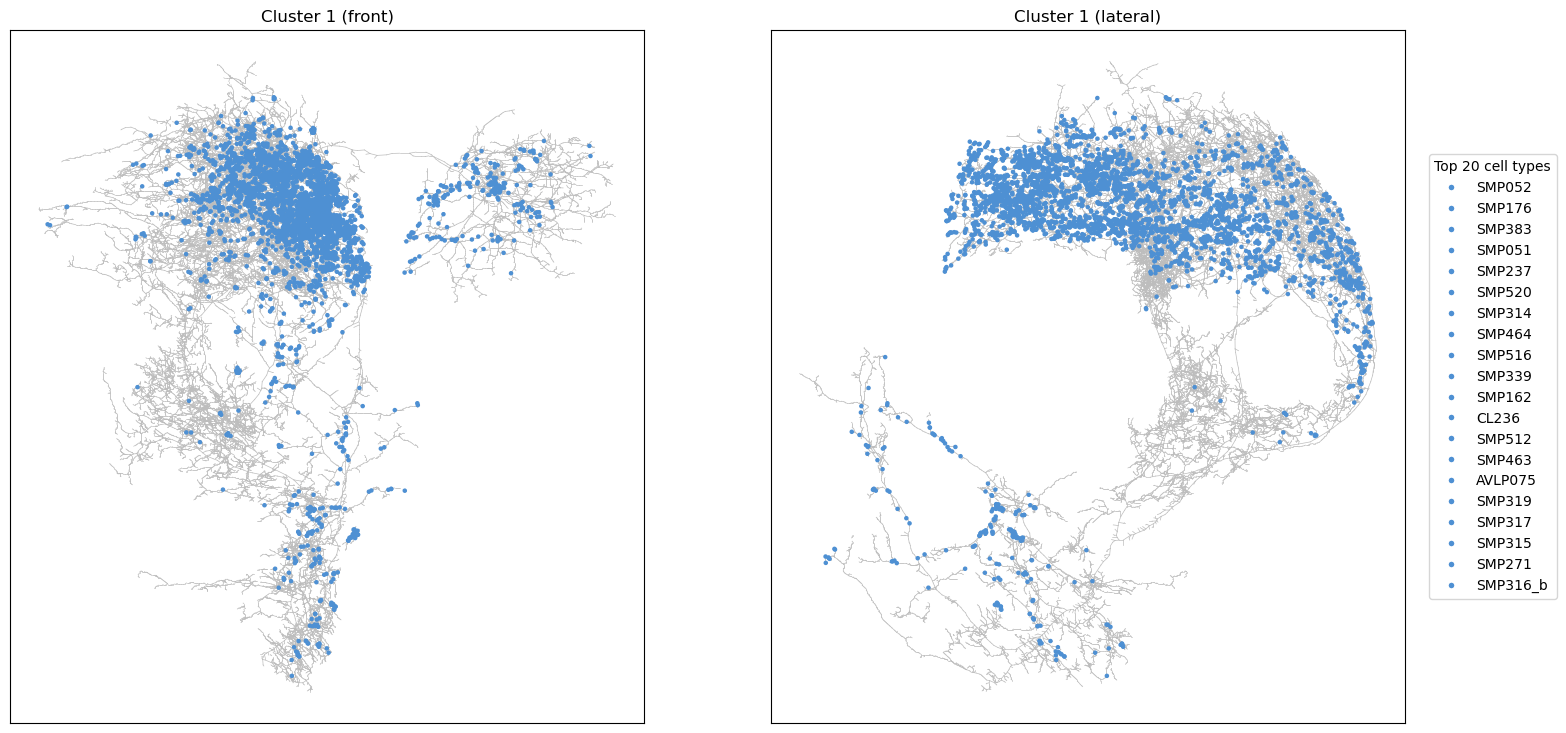

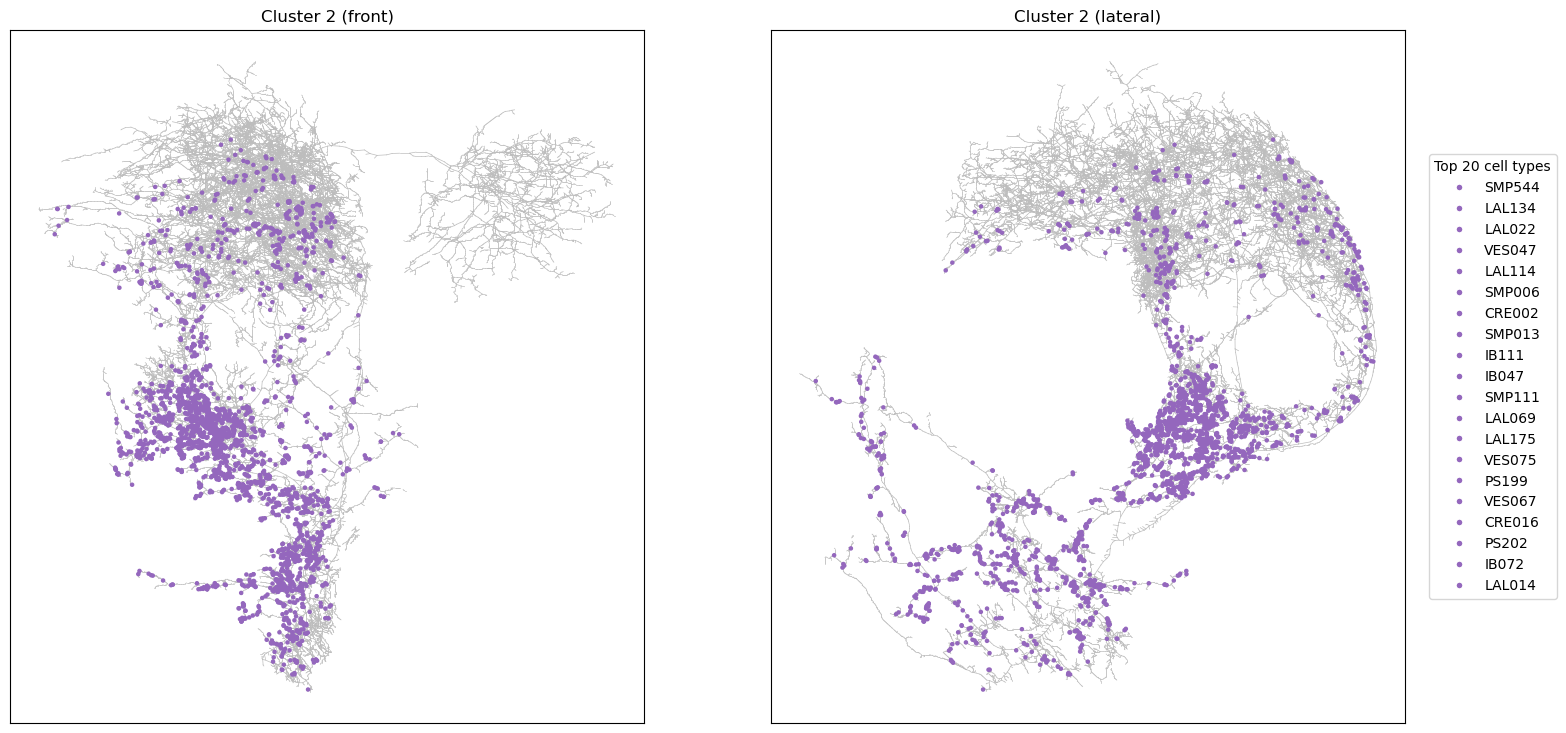

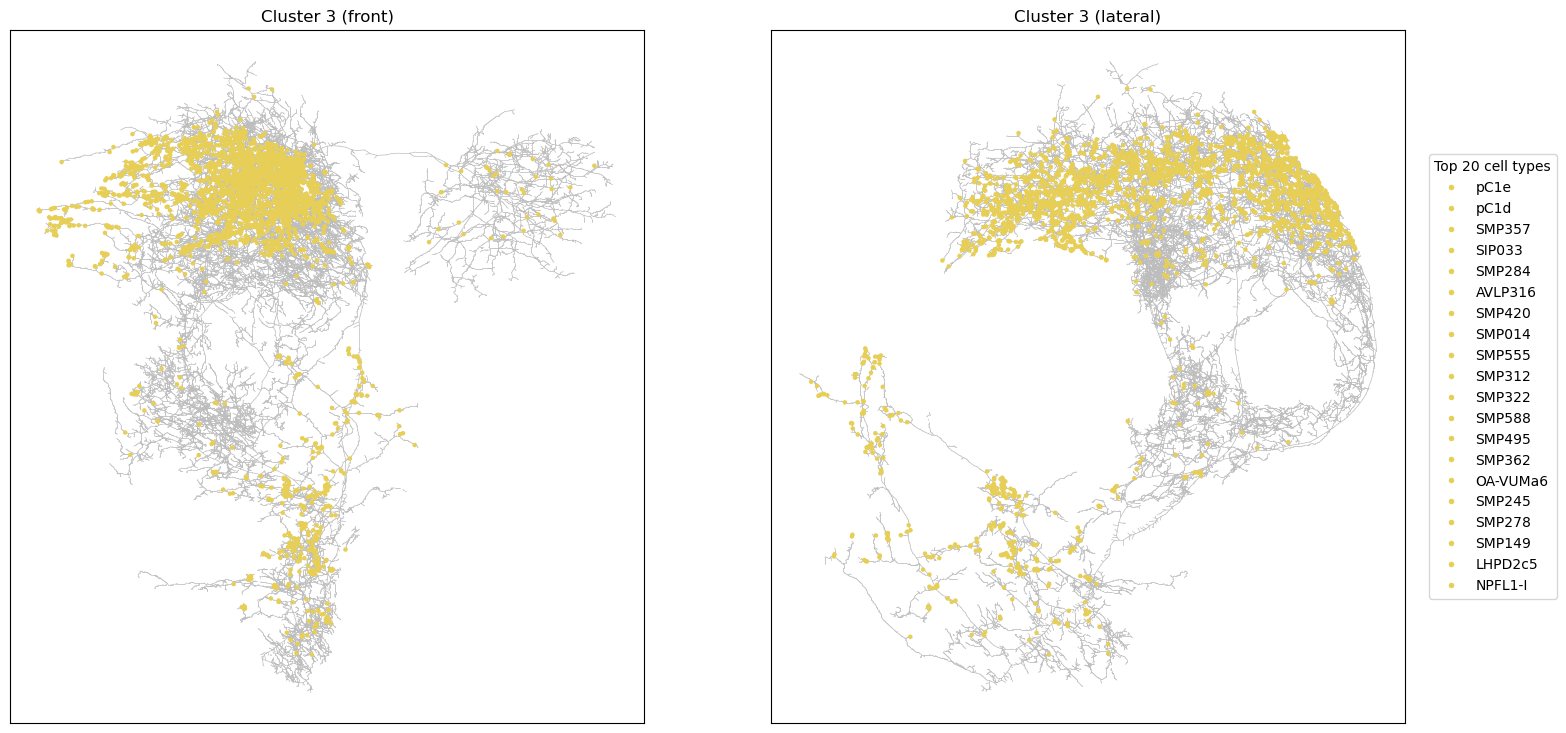

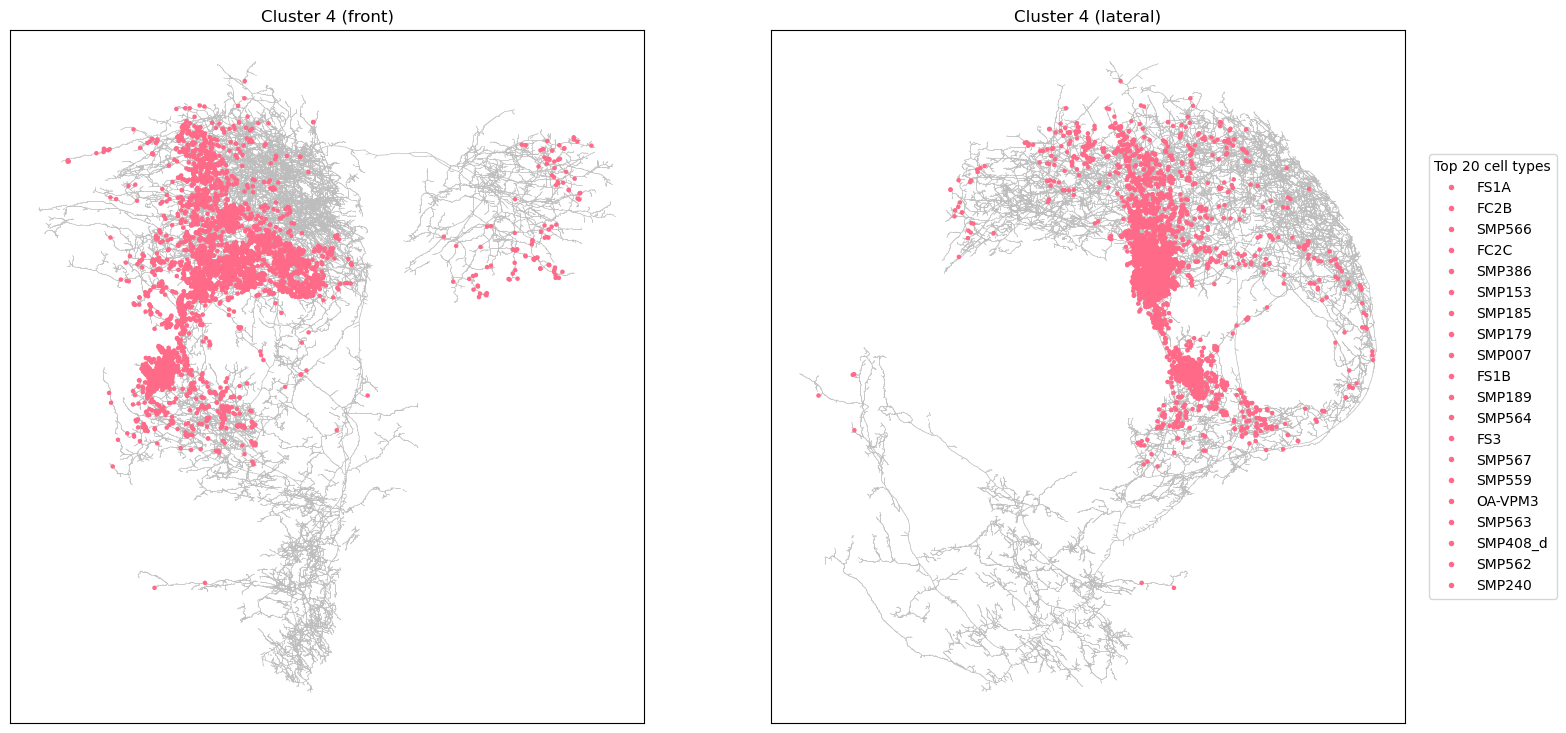

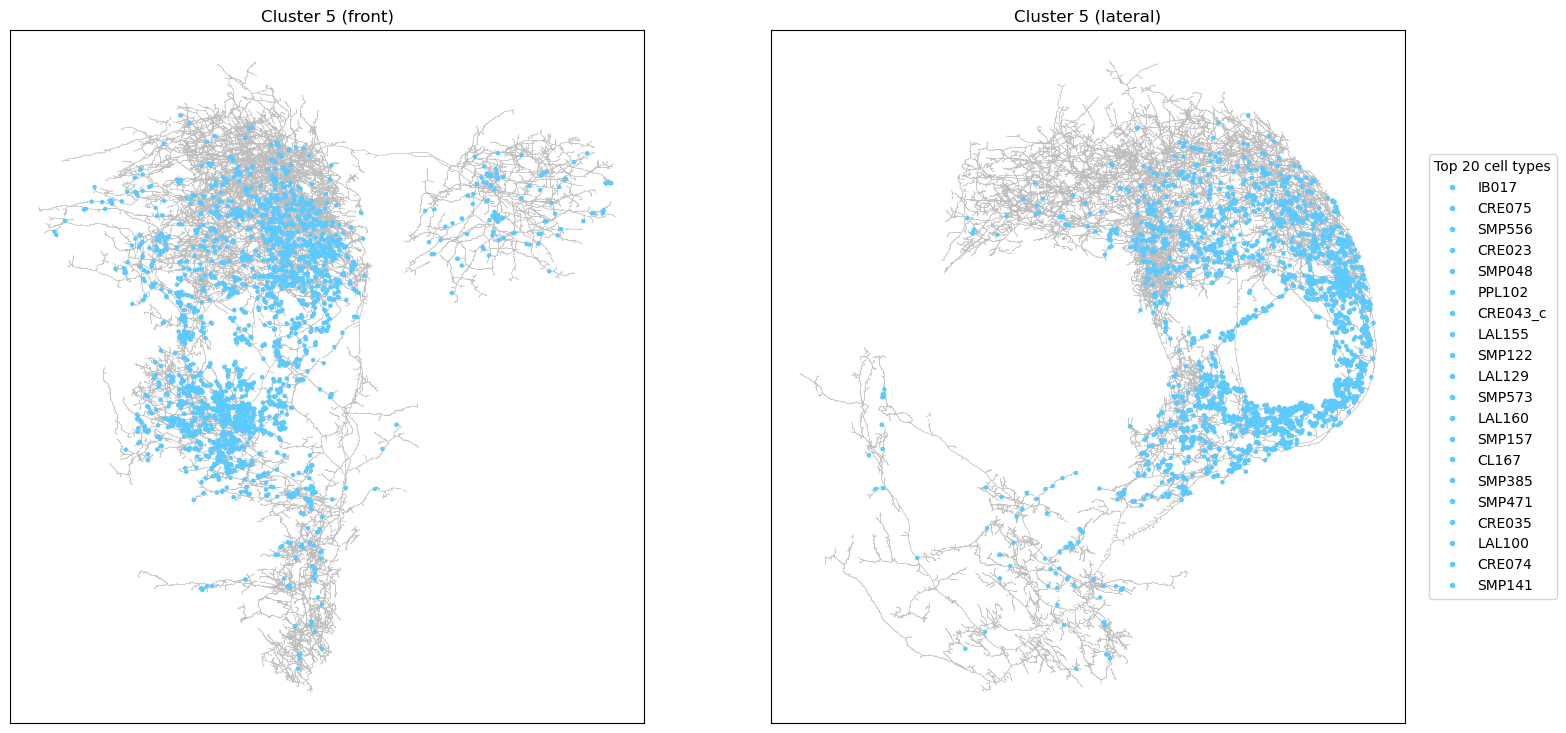

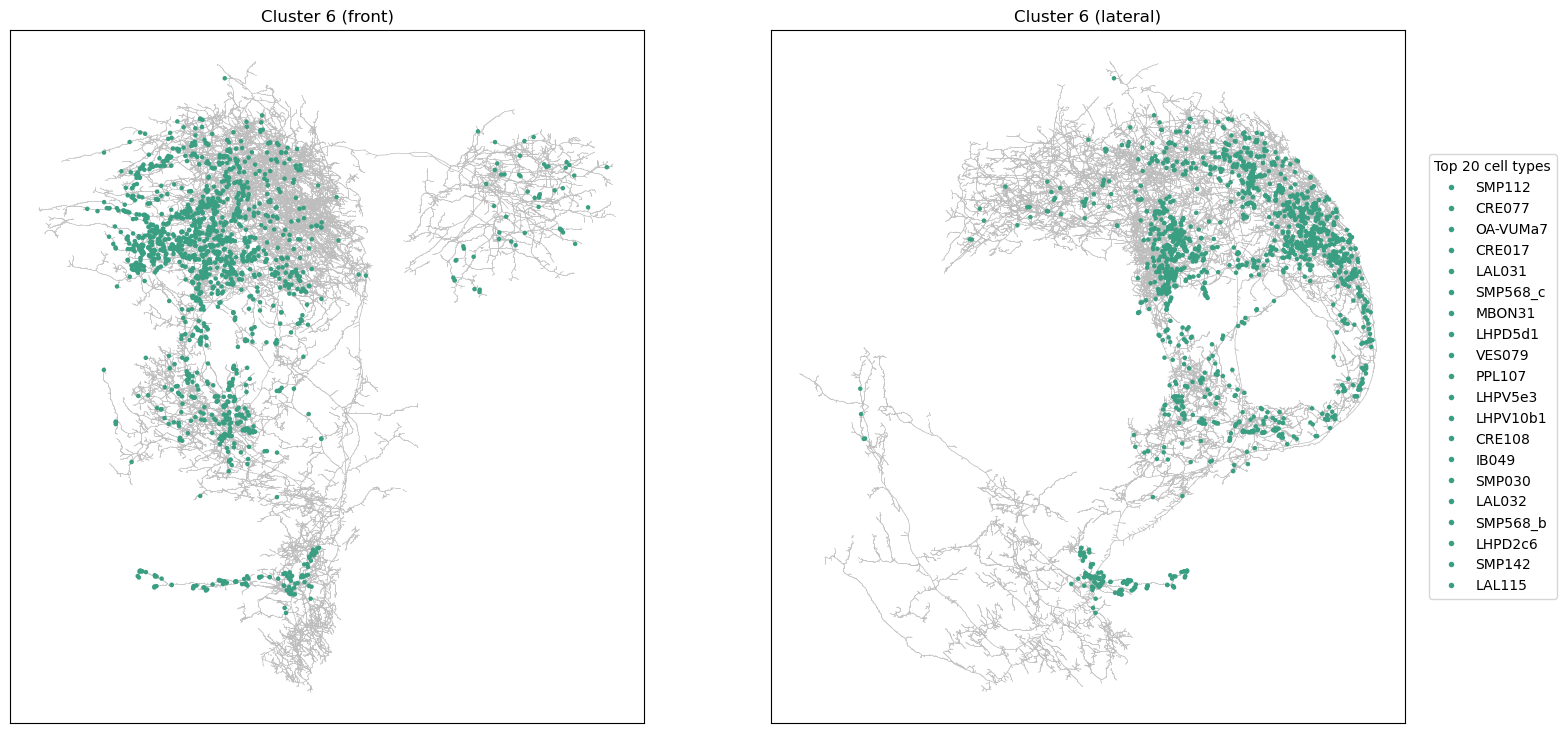

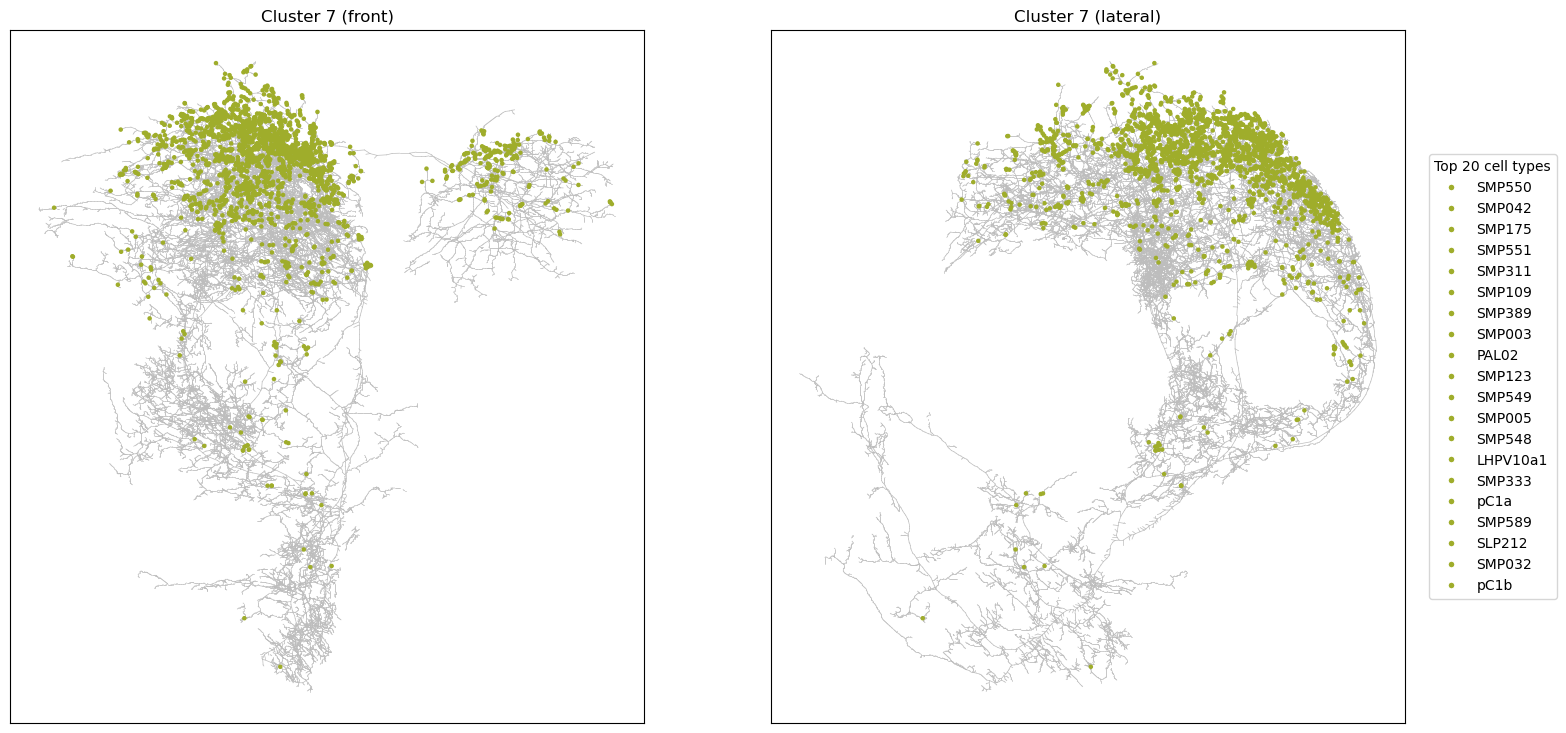

In [23]:
# Plot the skeleton plot so it just shows one cluster at a time, should be 7 plots
#clusters = [1, 2, 3, 4, 5, 6, 7]
clusters = ovi_clusters['0.0'].unique()

fig = cluster_nt(ovi_plotting, clusters)

In [24]:
fig.savefig("figures/syn_sites_separate_mods.svg", format='svg', dpi=1200)